# Proyek Akhir Analisis Data: [E-Commerce Public Dataset]

- Nama: Zidan Muhammad Ikvan
- Email: zidanikvan@gmail.com
- ID Student: mc404d5y0059


## Menentukan Pertanyaan Bisnis
- Bagaimana performa penjualan dan revenue perusahaan dalam beberapa bulan terakhir?
- Bagaimana demografi pelanggan yang kita miliki?
- Produk apa yang paling banyak dan paling sedikit terjual?

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [3]:
# membaca dataset customers_dataset.csv menggunakan pandas dan menyimpannya dalam DataFrame bernama customers_df. 
customers_df = pd.read_csv("E-Commerce Public Dataset/customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
# membaca dataset geolocation_dataset.csv menggunakan pandas dan menyimpannya dalam DataFrame bernama geolocations_df. 
geolocations_df = pd.read_csv("E-Commerce Public Dataset/geolocation_dataset.csv")
geolocations_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [5]:
# membaca dataset order_items_dataset.csv menggunakan pandas dan menyimpannya dalam DataFrame bernama orders_df. 
orders_df = pd.read_csv("E-Commerce Public Dataset/order_items_dataset.csv")
orders_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [6]:
# membaca dataset order_payments_dataset.csv menggunakan pandas dan menyimpannya dalam DataFrame bernama orders__payments_df.
orders_payments_df = pd.read_csv("E-Commerce Public Dataset/order_payments_dataset.csv")
orders_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [7]:
# membaca dataset orders_dataset.csv menggunakan pandas dan menyimpannya dalam DataFrame bernama orders_ori_df.
orders_ori_df = pd.read_csv("E-Commerce Public Dataset/orders_dataset.csv")
orders_ori_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [8]:
# membaca product_category_name_translation.csv menggunakan pandas dan menyimpannya dalam DataFrame bernama product_category_df.
product_category_df = pd.read_csv("E-Commerce Public Dataset/product_category_name_translation.csv")
product_category_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [9]:
# membaca dataset order_reviews_dataset.csv menggunakan pandas dan menyimpannya dalam DataFrame bernama orders_reviews_df.
orders_reviews_df = pd.read_csv("E-Commerce Public Dataset/order_reviews_dataset.csv")
orders_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [10]:
# membaca dataset products_dataset.csv menggunakan pandas dan menyimpannya dalam DataFrame bernama products_df.
products_df = pd.read_csv("E-Commerce Public Dataset/products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [11]:
# membaca dataset sellers_dataset.csv menggunakan pandas dan menyimpannya dalam DataFrame bernama sellers_df.
sellers_df = pd.read_csv("E-Commerce Public Dataset/sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


##### Insight
Mengumpulkan dan membaca dataset serta menyimpannya pada sebuah data frame

### Assessing Data

##### Menilai tabel customers

In [12]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [13]:
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [14]:
print("Jumlah duplikasi tabel customer:", customers_df.duplicated().sum())

Jumlah duplikasi tabel customer: 0


In [15]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


##### Menilai tabel geolocation

In [16]:
geolocations_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [17]:
print("jumlah duplikasi tabel geolocation:", geolocations_df.duplicated().sum())

jumlah duplikasi tabel geolocation: 261831


In [18]:
geolocations_df.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


In [19]:
duplicates_geolocation = geolocations_df[geolocations_df.duplicated(keep=False)]
duplicates_geolocation.head(20)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
6,1047,-23.546273,-46.641225,sao paulo,SP
7,1013,-23.546923,-46.634264,sao paulo,SP
8,1029,-23.543769,-46.634278,sao paulo,SP
9,1011,-23.547640,-46.636032,sao paulo,SP
10,1013,-23.547325,-46.634184,sao paulo,SP
13,1012,-23.548946,-46.634671,sao paulo,SP
15,1046,-23.546081,-46.644820,sao paulo,SP


##### Menilai tabel order_items

In [20]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [21]:
print("jumlah duplikasi pada tabel order:", orders_df.duplicated().sum())

jumlah duplikasi pada tabel order: 0


In [22]:
orders_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


##### Menilai tabel order_payments

In [23]:
orders_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [24]:
print("jumlah duplikasi pada tabel orders:", orders_payments_df.duplicated().sum())

jumlah duplikasi pada tabel orders: 0


In [25]:
orders_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


##### Menilai tabel order_reviews

In [26]:
orders_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [27]:
orders_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [28]:
print("jumlah duplikasi pada tabel orders_reviews:", orders_reviews_df.duplicated().sum())

jumlah duplikasi pada tabel orders_reviews: 0


In [29]:
orders_reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


##### Menilai tabel orders

In [30]:
orders_ori_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [31]:
orders_ori_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [32]:
print("jumlah duplikasi pada tabel orders:", orders_ori_df.duplicated().sum())

jumlah duplikasi pada tabel orders: 0


In [33]:
orders_ori_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:05:26,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 19:36:48,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [34]:
orders_ori_df['order_status'].value_counts()

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

##### Menilai tabel product_category_name_translation

In [35]:
product_category_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [36]:
print("jumlah duplikasi pada tabel produk kategori:", product_category_df.duplicated().sum())

jumlah duplikasi pada tabel produk kategori: 0


In [37]:
product_category_df.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


##### Menilai tabel products

In [38]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [39]:
print("jumlah duplikasi pada tabel products:", products_df.duplicated().sum())

jumlah duplikasi pada tabel products: 0


In [40]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [41]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


##### Menilai tabel sellers

In [42]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [43]:
print("jumlah duplikasi pada tabel seller:", sellers_df.duplicated().sum())

jumlah duplikasi pada tabel seller: 0


In [44]:
sellers_df.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


##### Insight
Melakukan penilaian dataset, seperti mengecek struktur tabel, duplikasi, missing value dan rangkuman informasi mengenai tabel tersebut

### Cleaning Data

##### Membersihkan tabel geolocation

In [45]:
geolocations_df = geolocations_df.drop_duplicates()

In [46]:
print(geolocations_df.duplicated().sum())

0


##### Membersihkan tabel order item

In [47]:
datetime_columns = ["shipping_limit_date"]
 
for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

In [48]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


##### Membersihkan tabel order reviews

In [49]:
# Mengubah type data
datetime_columns = ["review_creation_date", "review_answer_timestamp"]
 
for column in datetime_columns:
  orders_reviews_df[column] = pd.to_datetime(orders_reviews_df[column])

In [50]:
# mengisi missing value
orders_reviews_df['review_comment_title'].fillna("No Comment", inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_19332\3725621483.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  orders_reviews_df['review_comment_title'].fillna("No Comment", inplace=True)


In [51]:
# mengisi missing value
orders_reviews_df['review_comment_message'].fillna("No Comment", inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_19332\3375048182.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  orders_reviews_df['review_comment_message'].fillna("No Comment", inplace=True)


In [52]:
orders_reviews_df.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

##### Membersihkan tabel orders

In [53]:
# mengubah type data
datetime_columns = ["order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]
 
for column in datetime_columns:
  orders_ori_df[column] = pd.to_datetime(orders_ori_df[column])

##### Membersihkan tabel products

In [54]:
# drop products yang beratnya 0 
products_df = products_df[products_df['product_weight_g'] != 0]

In [55]:
products_df[products_df['product_weight_g'] == 0]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm


In [56]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [57]:
# menggantikan nilai NaN pada kolom product_description_lenght di products_df dengan nilai median dari kolom tersebut.
products_df['product_description_lenght'].fillna(products_df['product_description_lenght'].median(), inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_19332\3855537032.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_df['product_description_lenght'].fillna(products_df['product_description_lenght'].median(), inplace=True)


In [58]:
# menggantikan nilai NaN pada kolom product_name_lenght di products_df dengan nilai median dari kolom tersebut.
products_df['product_name_lenght'].fillna(products_df['product_name_lenght'].median(), inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_19332\3999095371.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_df['product_name_lenght'].fillna(products_df['product_name_lenght'].median(), inplace=True)


In [59]:
# menggantikan nilai NaN pada kolom product_photos_qty di products_df dengan nilai median dari kolom tersebut.
products_df['product_photos_qty'].fillna(products_df['product_photos_qty'].median(), inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_19332\1848435206.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_df['product_photos_qty'].fillna(products_df['product_photos_qty'].median(), inplace=True)


In [60]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght             0
product_description_lenght      0
product_photos_qty              0
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

##### insight
Melakukan perubahan type data, menghapus duplikasi, mengisi missing value dan beberapa hal lainnya

## Exploratory Data Analysis (EDA)

In [64]:
# Mengubah type data ke data time
orders_ori_df["order_purchase_timestamp"] = pd.to_datetime(orders_ori_df["order_purchase_timestamp"])

# Menggabungkan tabel orders dan payments
order_data = orders_ori_df.merge(orders_payments_df, on="order_id", how="inner")

# Mengubah ke datetime untuk resampling (agar bulan tanpa transaksi tetap muncul)
order_data.set_index("order_purchase_timestamp", inplace=True)

# Agregasi jumlah order dan revenue per bulan
monthly_sales = (order_data
                 .resample("M")  # Pastikan semua bulan ada
                 .agg(total_orders=("order_id", "count"),
                      total_revenue=("payment_value", "sum"))
                 .reset_index())

# Format tanggal 
monthly_sales["order_purchase_timestamp"] = monthly_sales["order_purchase_timestamp"].dt.strftime('%Y-%m')

# Ambil 10 data terbaru
monthly_sales = monthly_sales.tail(10)

# Menampilkan hasil
print(monthly_sales)

   order_purchase_timestamp  total_orders  total_revenue
14                  2017-11          7863     1194882.80
15                  2017-12          5895      878401.48
16                  2018-01          7563     1115004.18
17                  2018-02          6952      992463.34
18                  2018-03          7512     1159652.12
19                  2018-04          7209     1160785.48
20                  2018-05          7135     1153982.15
21                  2018-06          6419     1023880.50
22                  2018-07          6507     1066540.75
23                  2018-08          6698     1022425.32


C:\Users\User\AppData\Local\Temp\ipykernel_19332\3895098201.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample("M")  # Pastikan semua bulan ada


In [65]:
# Melakukan group customers berdasarkan kota dan provinsi
customer_summary = (customers_df
                    .groupby(["customer_state", "customer_city"])
                    .agg(customer_count=("customer_id", "count"))
                    .reset_index()
                    .sort_values(by="customer_count", ascending=False))

# Mengambil 10 kota dengan customers terbanyak
top_10_cities = customer_summary.head(10)

# Mengambil 5 kota dengan customers paling sedikit (memiliki setidaknya 1 pelanggan)
bottom_5_cities = customer_summary[customer_summary["customer_count"] > 0].tail(5)

# Menghitung total customer per provinsi
customer_by_state = customer_summary.groupby("customer_state")["customer_count"].sum().reset_index()

# Mengurutkan berdasarkan jumlah pelanggan
customer_by_state = customer_by_state.sort_values(by="customer_count", ascending=False)

# Mengambil 10 provinsi dengan customers terbanyak
top_10_states = customer_by_state.head(10)

# Mengambil 5 provinsi dengan customer paling sedikit
bottom_5_states = customer_by_state.tail(5)

# Menampilkan hasil eksplorasi
print("🔹 Top 10 Kota dengan customers Terbanyak:")
print(top_10_cities)

print("\n🔹 Bottom 5 Kota dengan customers Paling Sedikit:")
print(bottom_5_cities)

print("\n🔹 Top 10 Provinsi dengan customers Terbanyak:")
print(top_10_states)

print("\n🔹 Bottom 5 Provinsi dengan customers Paling Sedikit:")
print(bottom_5_states)

🔹 Top 10 Kota dengan customers Terbanyak:
     customer_state          customer_city  customer_count
4176             SP              sao paulo           15540
2788             RJ         rio de janeiro            6882
1062             MG         belo horizonte            2773
601              DF               brasilia            2131
2406             PR               curitiba            1521
3729             SP               campinas            1444
3208             RS           porto alegre            1379
372              BA               salvador            1245
3836             SP              guarulhos            1189
4160             SP  sao bernardo do campo             938

🔹 Bottom 5 Kota dengan customers Paling Sedikit:
     customer_state    customer_city  customer_count
3029             RS  capivari do sul               1
3028             RS          capitao               1
4305             TO     silvanopolis               1
4287             TO          lajeado           

In [66]:
# Menghitung jumlah produk terjual
product_sales = orders_df["product_id"].value_counts().reset_index()
product_sales.columns = ["product_id", "sales"]

# Menggabungkan dengan kategori produk
product_sales = product_sales.merge(products_df[["product_id", "product_category_name"]], on="product_id", how="left")

# Mengambil 10 produk terlaris
top_10_products = product_sales.head(10)

# Mengambil 10 produk paling sedikit terjual
bottom_10_products = product_sales.tail(10)

# Menampilkan hasil eksplorasi
print("Top 10 Produk Terlaris:")
print(top_10_products)

print("\nBottom 10 Produk Paling Sedikit Terjual:")
print(bottom_10_products)

Top 10 Produk Terlaris:
                         product_id  sales   product_category_name
0  aca2eb7d00ea1a7b8ebd4e68314663af    527        moveis_decoracao
1  99a4788cb24856965c36a24e339b6058    488         cama_mesa_banho
2  422879e10f46682990de24d770e7f83d    484      ferramentas_jardim
3  389d119b48cf3043d311335e499d9c6b    392      ferramentas_jardim
4  368c6c730842d78016ad823897a372db    388      ferramentas_jardim
5  53759a2ecddad2bb87a079a1f1519f73    373      ferramentas_jardim
6  d1c427060a0f73f6b889a5c7c61f2ac4    343  informatica_acessorios
7  53b36df67ebb7c41585e8d54d6772e08    323      relogios_presentes
8  154e7e31ebfa092203795c972e5804a6    281            beleza_saude
9  3dd2a17168ec895c781a9191c1e95ad7    274  informatica_acessorios

Bottom 10 Produk Paling Sedikit Terjual:
                             product_id  sales   product_category_name
32941  4cc4d02efc8f249c13355147fb44e34d      1      ferramentas_jardim
32942  b10ecf8e33aaaea419a9fa860ea80fb5      1        m

##### Insight
Melakukan penggabungan data dengan mengambil dari beberapa tabel yang berbeda, menyesuaikan dengan data yang dibutuhkan dengan pertanyaan bisnis.

## Visualization & Explanatory Analysis

#### Pertanyaan 1: Bagaimana performa penjualan dan revenue perusahaan dalam beberapa bulan terakhir?

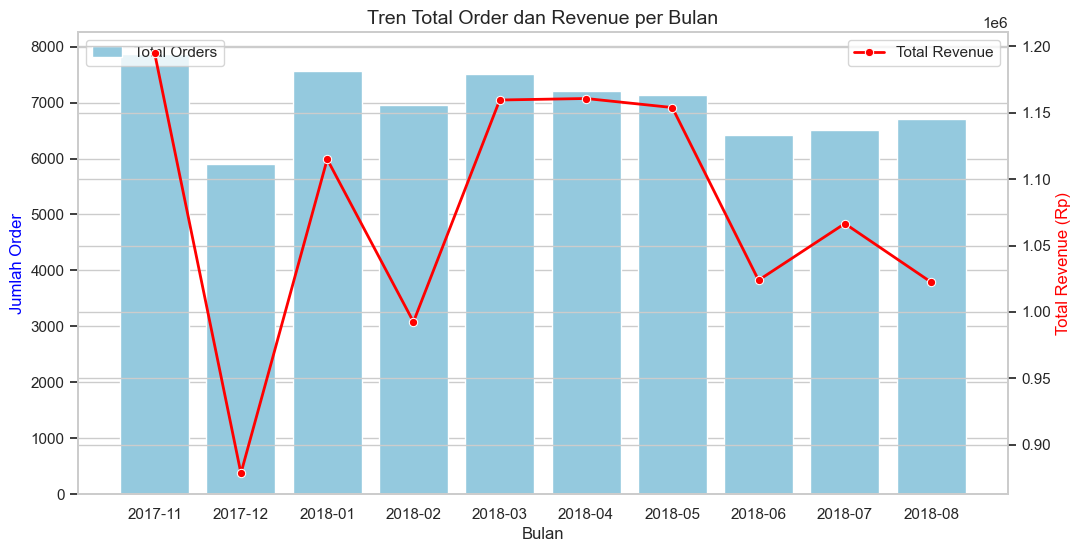

In [69]:
# Gaya visualisasi
sns.set_theme(style="whitegrid")

# Ukuran figure
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot total orders sebagai bar chart
sns.barplot(data=monthly_sales, 
            x="order_purchase_timestamp", 
            y="total_orders", 
            color="skyblue", 
            label="Total Orders", 
            ax=ax1)

# Buat sumbu y kedua untuk revenue
ax2 = ax1.twinx()
sns.lineplot(data=monthly_sales, 
             x="order_purchase_timestamp", 
             y="total_revenue", 
             marker="o", 
             color="red", 
             linewidth=2, 
             label="Total Revenue", 
             ax=ax2)

# Label dan judul
ax1.set_xlabel("Bulan", fontsize=12)
ax1.set_ylabel("Jumlah Order", fontsize=12, color="blue")
ax2.set_ylabel("Total Revenue (Rp)", fontsize=12, color="red")
plt.title("Tren Total Order dan Revenue per Bulan", fontsize=14)

# Rotasi label x agar lebih rapi
plt.xticks(rotation=45)

# Tambahkan legenda
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

# Tampilkan plot
plt.show()

#### Pertanyaan 2: Bagaimana demografi pelanggan yang kita miliki?

C:\Users\User\.virtualenvs\Jupyter-FE-eyk5q\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


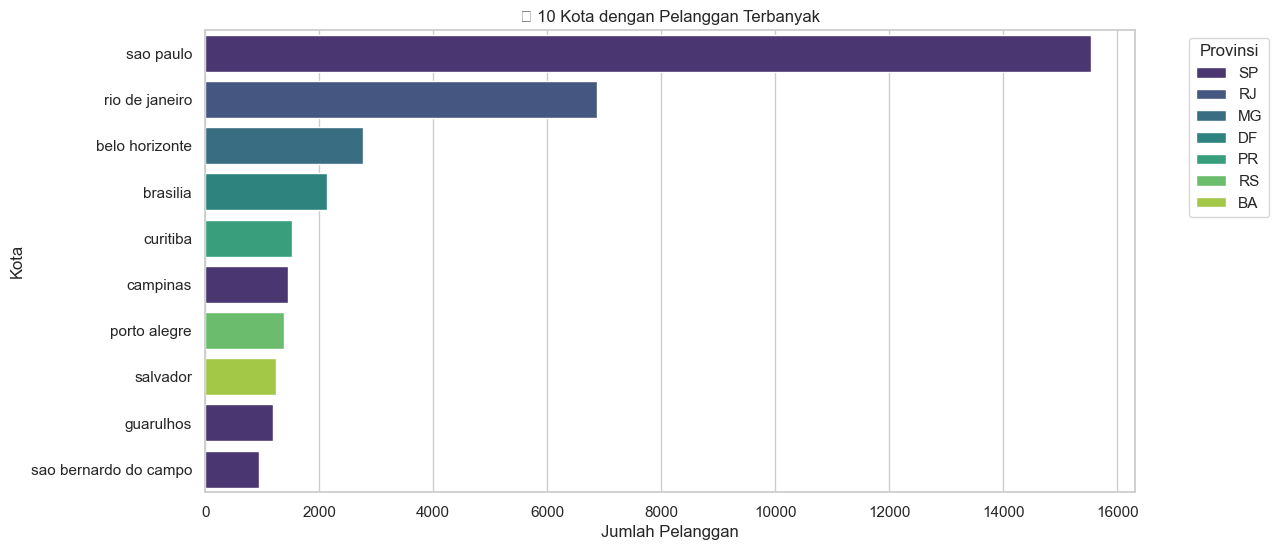

C:\Users\User\.virtualenvs\Jupyter-FE-eyk5q\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


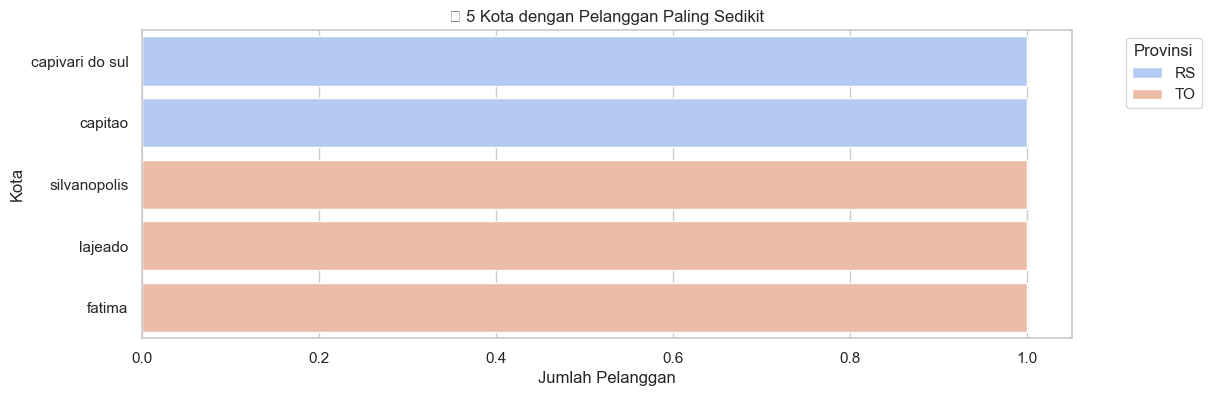

C:\Users\User\AppData\Local\Temp\ipykernel_19332\289642551.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_states,
C:\Users\User\.virtualenvs\Jupyter-FE-eyk5q\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


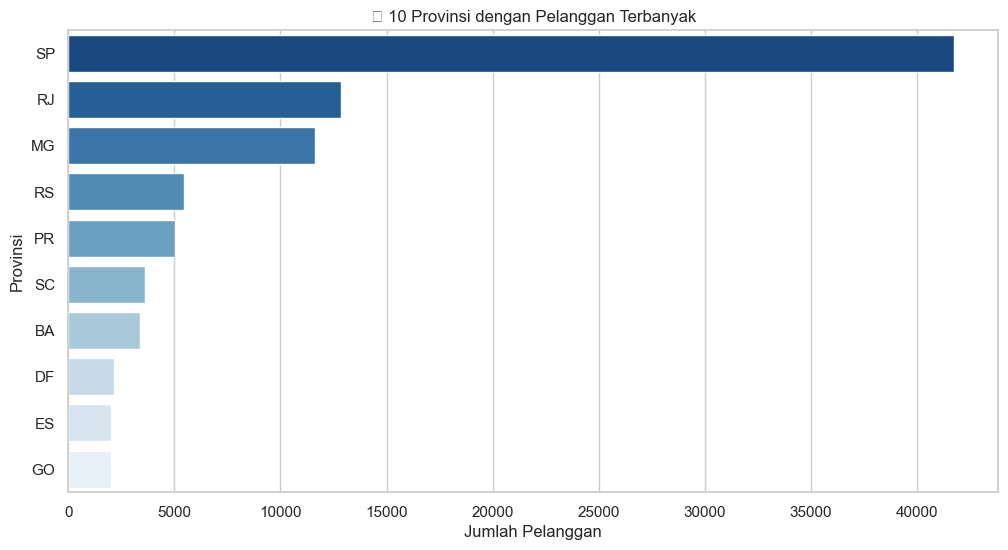

C:\Users\User\AppData\Local\Temp\ipykernel_19332\289642551.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_5_states,
C:\Users\User\.virtualenvs\Jupyter-FE-eyk5q\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


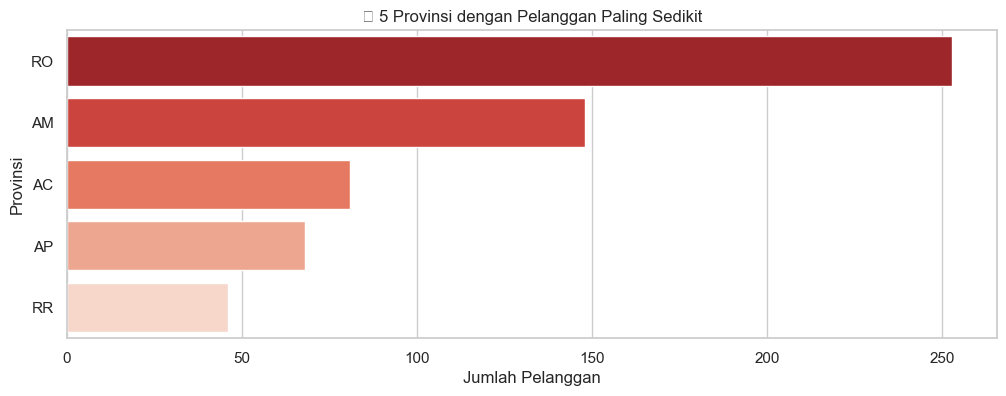

In [79]:
# Set style
sns.set_theme(style="whitegrid")

# 🔹 Visualisasi 10 Kota dengan Pelanggan Terbanyak
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_cities, 
            x="customer_count", 
            y="customer_city", 
            hue="customer_state", 
            dodge=False, 
            palette="viridis")

plt.xlabel("Jumlah Pelanggan")
plt.ylabel("Kota")
plt.title("🔹 10 Kota dengan Pelanggan Terbanyak")
plt.legend(title="Provinsi", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# 🔹 Visualisasi 5 Kota dengan Pelanggan Paling Sedikit
plt.figure(figsize=(12, 4))
sns.barplot(data=bottom_5_cities, 
            x="customer_count", 
            y="customer_city", 
            hue="customer_state", 
            dodge=False, 
            palette="coolwarm")

plt.xlabel("Jumlah Pelanggan")
plt.ylabel("Kota")
plt.title("🔹 5 Kota dengan Pelanggan Paling Sedikit")
plt.legend(title="Provinsi", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# 🔹 Visualisasi 10 Provinsi dengan Pelanggan Terbanyak
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_states, 
            x="customer_count", 
            y="customer_state", 
            palette="Blues_r")

plt.xlabel("Jumlah Pelanggan")
plt.ylabel("Provinsi")
plt.title("🔹 10 Provinsi dengan Pelanggan Terbanyak")
plt.show()

# 🔹 Visualisasi 5 Provinsi dengan Pelanggan Paling Sedikit
plt.figure(figsize=(12, 4))
sns.barplot(data=bottom_5_states, 
            x="customer_count", 
            y="customer_state", 
            palette="Reds_r")

plt.xlabel("Jumlah Pelanggan")
plt.ylabel("Provinsi")
plt.title("🔹 5 Provinsi dengan Pelanggan Paling Sedikit")
plt.show()

#### Pertanyaan 3: Produk apa yang paling banyak dan paling sedikit terjual??

C:\Users\User\AppData\Local\Temp\ipykernel_19332\3210342840.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_products["label"] = top_10_products["product_id"] + " - " + top_10_products["product_category_name"]
C:\Users\User\AppData\Local\Temp\ipykernel_19332\3210342840.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bottom_10_products["label"] = bottom_10_products["product_id"] + " - " + bottom_10_products["product_category_name"]
C:\Users\User\AppData\Local\Temp\ipykernel_19332\3210342840.py:

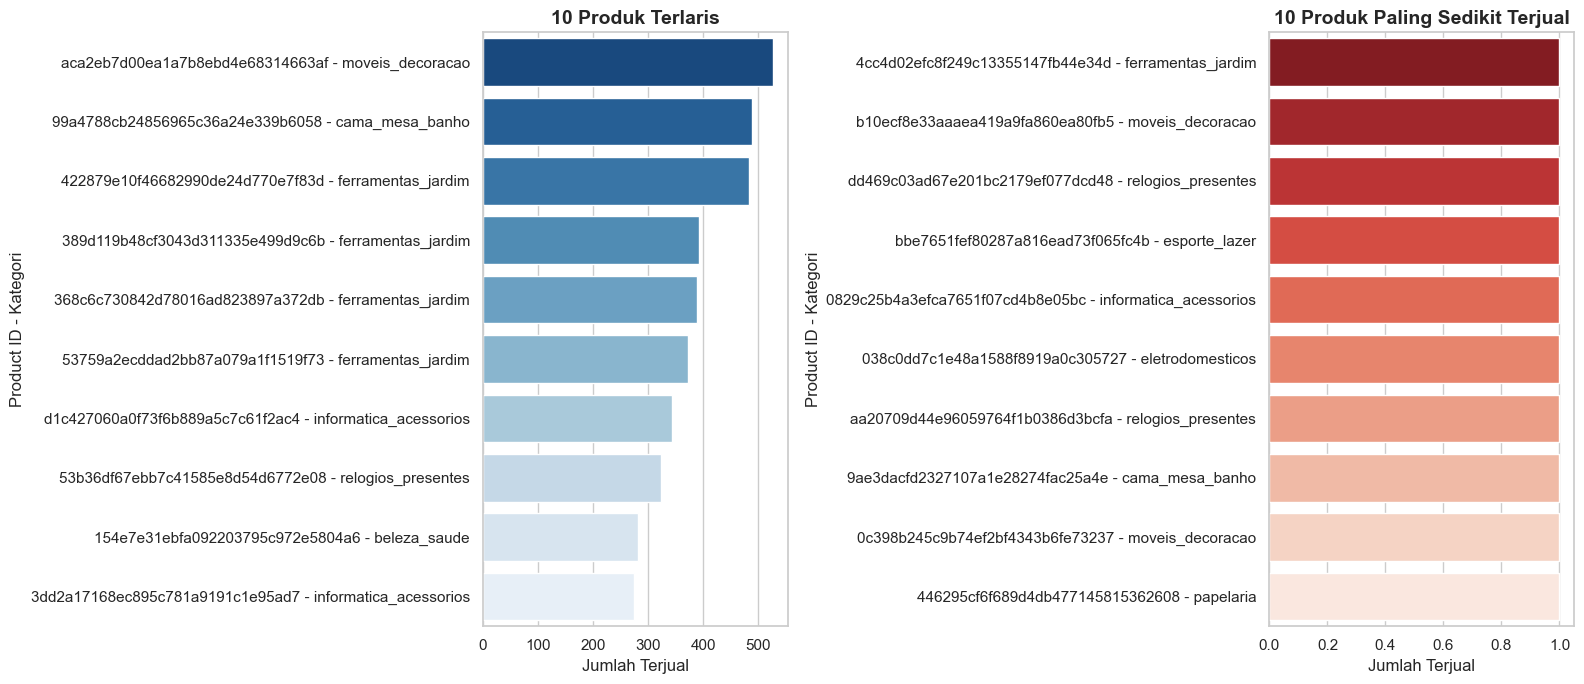

In [71]:
# Gaya visualisasi 
sns.set_theme(style="whitegrid")

# Menggabungkan Product ID dan Kategori 
top_10_products["label"] = top_10_products["product_id"] + " - " + top_10_products["product_category_name"]
bottom_10_products["label"] = bottom_10_products["product_id"] + " - " + bottom_10_products["product_category_name"]

# Ukuran figure
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# 🔹 Visualisasi 10 Produk Terlaris
sns.barplot(data=top_10_products, 
            x="sales", 
            y="label", 
            palette="Blues_r", 
            ax=axes[0])

axes[0].set_title("10 Produk Terlaris", fontsize=14, fontweight="bold")
axes[0].set_xlabel("Jumlah Terjual", fontsize=12)
axes[0].set_ylabel("Product ID - Kategori", fontsize=12)

# 🔹 Visualisasi 10 Produk Paling Sedikit Terjual
sns.barplot(data=bottom_10_products, 
            x="sales", 
            y="label", 
            palette="Reds_r", 
            ax=axes[1])

axes[1].set_title("10 Produk Paling Sedikit Terjual", fontsize=14, fontweight="bold")
axes[1].set_xlabel("Jumlah Terjual", fontsize=12)
axes[1].set_ylabel("Product ID - Kategori", fontsize=12)

plt.tight_layout()
plt.show()


#### Insight
Mengimplementasikan data yang sudah melewati tahapan data wrangling dan Eksplorasi menjadi sebuah visualisasi data yang menarik

## Conclusion

- Pertanyaan 1:
  Dalam 10 bulan terakhir, jumlah pesanan dan total pendapatan menunjukkan tren yang stabil. Ada saat dimana jumlah pesanan dan pendapatan sangat baik,   yaitu pada 2017-11 dan Ada saat dimana jumlah pesanan dan pendapatan turun cukup drastis, yaitu pada 2017-12. Namun, di 3 bulan terakhir menunjukkan    tren yang cukup baik.
- Pertanyaan 2:
  Sebagian besar pelanggan berasal dari kota-kota besar, dengan dominasi di 10 kota teratas, sementara distribusi di berbagai provinsi menunjukkan variasi. Terdapat perbedaan signifikan dalam jumlah pelanggan antarprovinsi, dan lima kota dengan jumlah pelanggan terendah berpotensi menjadi target pasar baru yang memerlukan strategi promosi lebih intensif.
- Pertanyaan 3:
  Produk terlaris didominasi oleh kategori moveis_decoracao, cama_mesa_banho, dan ferramentas_jardim, dengan penjualan tertinggi mencapai 527 unit. Kategori moveis_decoracao, cama_mesa_banho, dan ferramentas_jardim juga memiliki beberapa produk dengan angka penjualan tinggi maupun rendah, menunjukkan adanya variasi dalam permintaan produk di kategori ini.
  

In [76]:
top_10_products.to_csv("top_10_products.csv", index=False)
bottom_10_products.to_csv("bottom_10_products.csv", index=False)
monthly_sales.to_csv("monthly_sales.csv", index=False)

In [77]:
top_10_cities.to_csv("top_10_cities.csv", index=False)
bottom_5_cities.to_csv("bottom_5_cities.csv", index=False)
top_10_states.to_csv("top_10_states.csv", index=False)
bottom_5_states.to_csv("bottom_5_states.csv", index=False)

In [78]:
top_10_products.to_csv("top_10_products.csv", index=False)
bottom_10_products.to_csv("bottom_10_products.csv", index=False)